# Tune modulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sussix


def get_FFT(x):
    x     = np.array(x)
    turns = np.arange(len(x))

    # Cropping signal to closest power of 2
    Nt      = len(x)
    crop_at = 2**int(np.log2(Nt))

    spectrum = np.fft.fft(x[:crop_at])
    freq     = np.fft.fftfreq(turns[:crop_at].shape[-1])

    idx      = np.argmax(np.abs(spectrum))
    Qx       = freq[idx]
    return freq[freq>0],np.abs(spectrum)[freq>0]

---
# Phasor decomposition
---

See https://cds.cern.ch/record/201687/files/p157.pdf

One can show that the following phase modulation can be expressed as a sum of ponctual harmonics. nafflib can accurately find those back!

Text(0.5, 0, 'Freq (Q - Qx)')

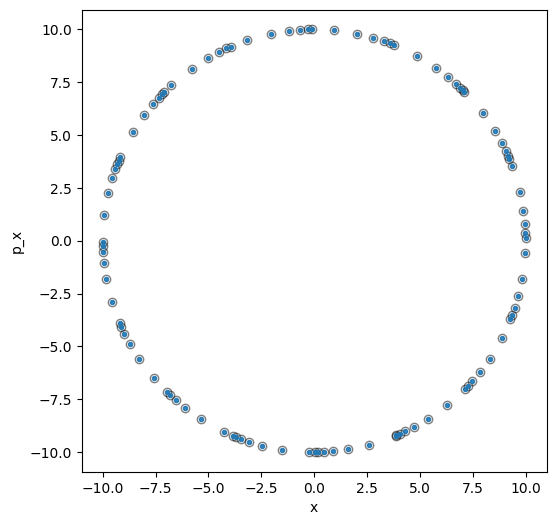

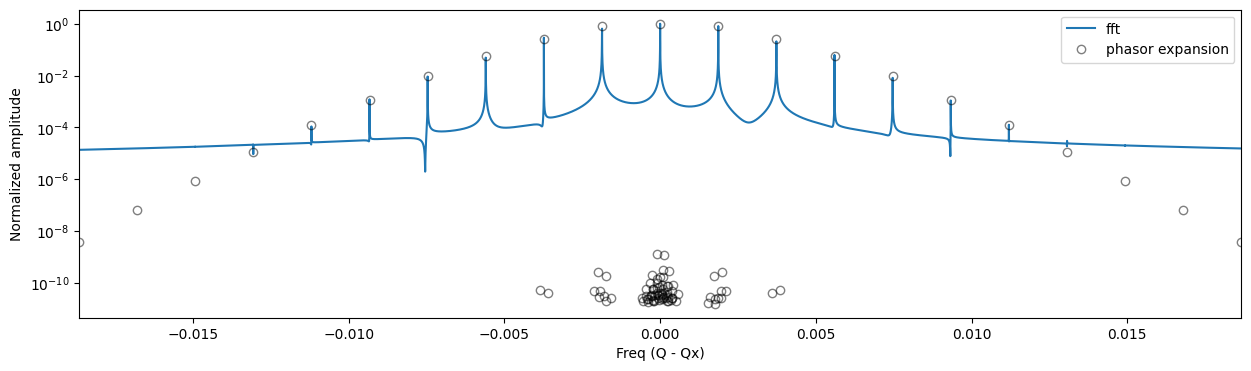

In [11]:

Qx,Qy,Qzeta = [0.3100208433909691, 0.32002046321603844, 0.001866552984419961]


a  = 0.2
N = np.arange(1,int(1e6))


phase  = a*np.sin(2*np.pi*Qzeta*N)
signal = 10*np.exp(2*np.pi*1j*(Qx*N + phase))

x,px = np.real(signal),-np.imag(signal)




N = np.arange(int(1e4))
spectrum = sussix.harmonics(x[:np.max(N)+1],px[:np.max(N)+1],window_order=4,num_harmonics=100,to_pandas=True)
z,pz = sussix.generate_signal(spectrum.amplitude,spectrum.frequency,N)
nmax = 100
plt.figure(figsize=(6,6))
plt.plot(x[:nmax],px[:nmax],'o',mfc='none',color='k',alpha=0.5)
plt.plot(z[:nmax],pz[:nmax],'.',alpha=0.9)

plt.ylabel('p_x')
plt.xlabel('x')

plt.axis('equal')

plt.figure(figsize=(15,4))
freq,s_fft = get_FFT(x)
plt.plot(freq-Qx,s_fft/np.max(s_fft),label='fft')
plt.plot(spectrum.frequency-Qx,spectrum.amplitude.abs()/np.max(spectrum.amplitude.abs()),'o',mfc='none',color='k',alpha=0.5,label = 'phasor expansion')
plt.xlim(-10*Qzeta,10*Qzeta)
plt.yscale('log')
plt.legend()
plt.ylabel('Normalized amplitude')
plt.xlabel('Freq (Q - Qx)')

---
# Innaproriate expansion
---

However, by slightly changing the modulation, a continuum of frequencies are excited, and nafflib can no longer help. One should only use the tool to perform a phasor decomposition!

$$\phi(N) = a\sin(2\pi Q_\zeta N)\quad\rightarrow\quad\phi(N) = a\sin(2\pi Q_\zeta N) \cdot N$$

Text(0.5, 0, 'Freq (Q - Qx)')

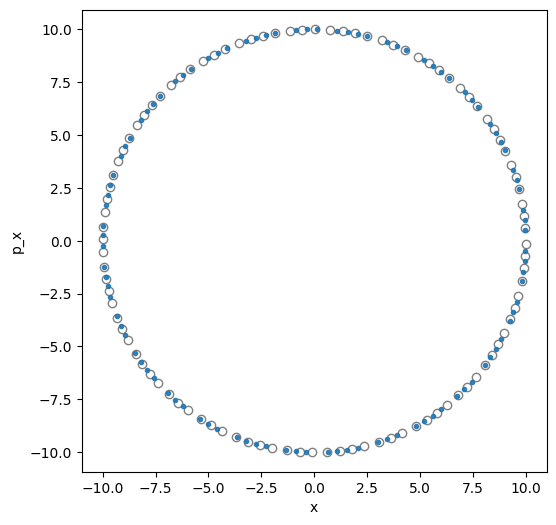

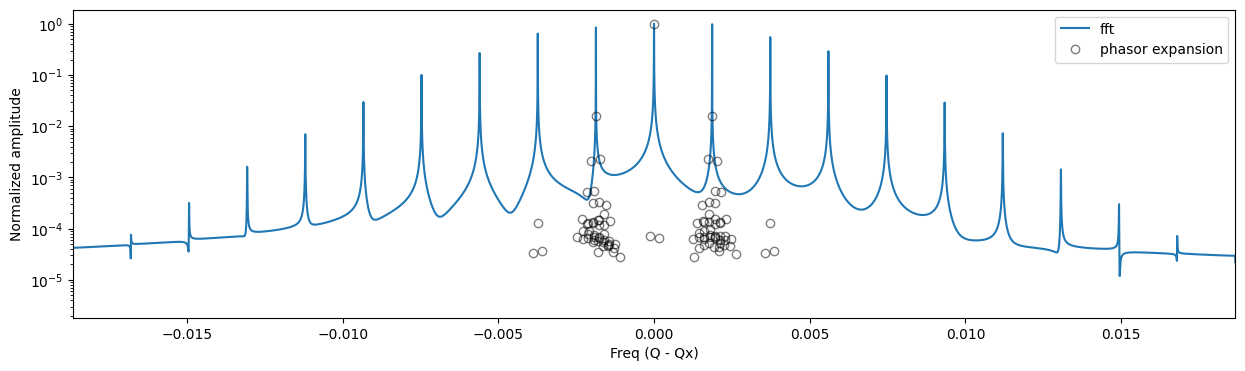

In [7]:

Qx,Qy,Qzeta = [0.3100208433909691, 0.32002046321603844, 0.001866552984419961]


a  = 1e-6
N = np.arange(1,int(1e6))


phase  = a*np.sin(2*np.pi*Qzeta*N)*N
signal = 10*np.exp(2*np.pi*1j*(Qx*N + phase))

x,px = np.real(signal),-np.imag(signal)




N = np.arange(int(1e4))
spectrum = sussix.harmonics(x[:np.max(N)+1],px[:np.max(N)+1],window_order=4,num_harmonics=100,to_pandas=True)
z,pz = sussix.generate_signal(spectrum.amplitude,spectrum.frequency,N)
nmax = 100
plt.figure(figsize=(6,6))
plt.plot(x[:nmax],px[:nmax],'o',mfc='none',color='k',alpha=0.5)
plt.plot(z[:nmax],pz[:nmax],'.',alpha=0.9)

plt.ylabel('p_x')
plt.xlabel('x')

plt.axis('equal')

plt.figure(figsize=(15,4))
freq,s_fft = get_FFT(x)
plt.plot(freq-Qx,s_fft/np.max(s_fft),label='fft')
plt.plot(spectrum.frequency-Qx,spectrum.amplitude.abs()/np.max(spectrum.amplitude.abs()),'o',mfc='none',color='k',alpha=0.5,label = 'phasor expansion')
plt.xlim(-10*Qzeta,10*Qzeta)
plt.yscale('log')
plt.legend()
plt.ylabel('Normalized amplitude')
plt.xlabel('Freq (Q - Qx)')